In [77]:
import pandas as pd

df1 = pd.read_csv("../data/processed_data.csv")
df1.head()  # 先頭の5件を表示

,job_title,location,income,skill,データベース,AWS,機械学習,Webフレームワーク,データ分析,min_income,max_income,avg_income
0,Pythonエンジニア,"東京都, 神奈川県, 千葉県, 埼玉県, 大阪府, 兵庫県, 京都府, 愛知県, 北海道, ...",504万円〜1080万円,"SQL, Python, Django, AWS, PostgreSQL",1,1,0,1,0,504.0,1080.0,792.0
1,Pythonエンジニア,"東京都, 神奈川県, 千葉県, 埼玉県, 大阪府, 兵庫県, 京都府, 愛知県, 北海道, ...",530万円〜1000万円,"JavaScript, SQL, PHP, Ruby, Java, Python, Swif...",1,1,1,1,1,530.0,1000.0,765.0
2,開発エンジニア,"東京都, 神奈川県, 千葉県, 埼玉県",400万円〜1100万円,"C#, C, C++, Objective-C, JavaScript, VBA, PHP,...",1,1,0,1,0,400.0,1100.0,750.0
3,データエンジニア,東京都,400万円〜600万円,"SQL, Python",1,0,0,0,0,400.0,600.0,500.0
4,Pythonエンジニア,"東京都, 神奈川県, 千葉県, 埼玉県, 大阪府, 愛知県, 福岡県",350万円〜700万円,"JavaScript, PHP, Ruby, Java, Python, Go, CakeP...",1,1,0,1,0,350.0,700.0,525.0


In [78]:
df1.tail()

,job_title,location,income,skill,データベース,AWS,機械学習,Webフレームワーク,データ分析,min_income,max_income,avg_income
230,開発エンジニア,宮城県,450万円〜530万円,"Objective-C, JavaScript, PHP, Java, Python, Sw...",0,0,0,0,0,450.0,530.0,490.0
231,SRE,"東京都, 神奈川県, 千葉県, 埼玉県, 大阪府, 兵庫県, 京都府, 愛知県, 北海道, ...",550万円〜1200万円,"Ruby, Python, Ruby on Rails, Django, Node.js, ...",1,1,0,1,0,550.0,1200.0,875.0
232,データアナリスト,"東京都, 神奈川県, 千葉県, 埼玉県, 茨城県, 栃木県, 群馬県, フルリモート",500万円〜1080万円,"SQL, Python, R, Hadoop",1,0,0,0,0,500.0,1080.0,790.0
233,Webエンジニア,京都府,460万円〜650万円,"JavaScript, PHP, Python, jQuery, AWS, Laravel,...",0,1,0,0,0,460.0,650.0,555.0
234,開発エンジニア,大阪府,420万円〜800万円,"C, C++, Java, Python, Go, AWS, Docker, MySQL, ...",1,1,0,0,0,420.0,800.0,610.0


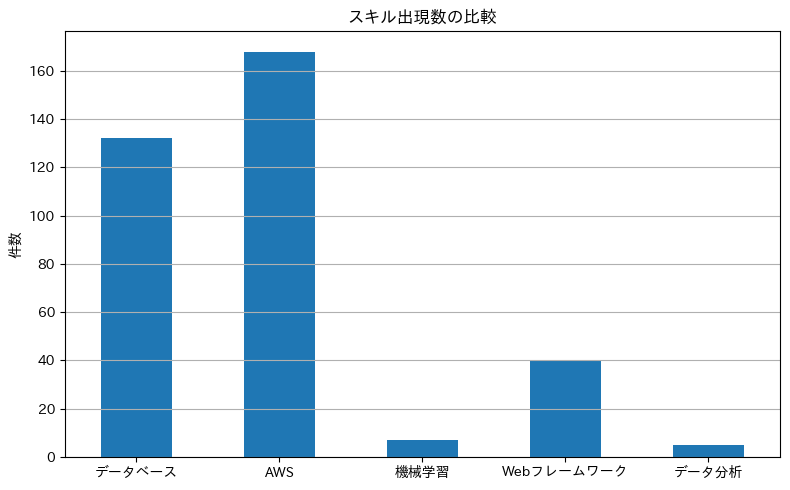

In [79]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# カラムごとの合計値を取得
skill_counts = df1[["データベース", "AWS", "機械学習", "Webフレームワーク", "データ分析"]].sum()

# グラフ描画
plt.figure(figsize=(8, 5))
skill_counts.plot(kind="bar")
plt.title("スキル出現数の比較")
plt.ylabel("件数")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

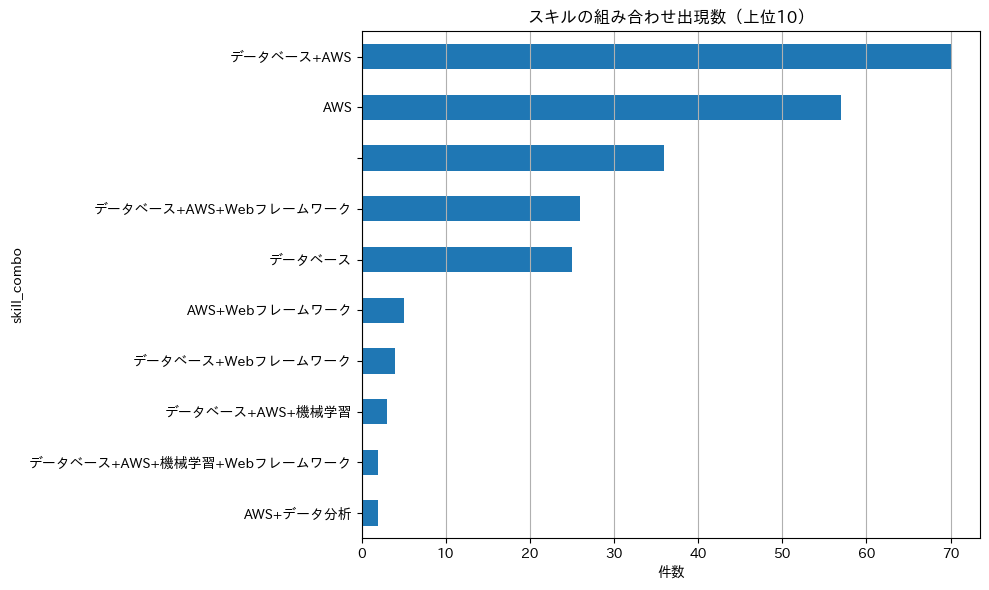

In [82]:
# 1. スキルが1の列名を求人ごとに取得
def get_skill_combination(row):
    return '+'.join([col for col in row.index if row[col] == 1])

df1["skill_combo"] = df1[["データベース", "AWS", "機械学習", "Webフレームワーク", "データ分析"]].apply(get_skill_combination, axis=1)

# 2. 組み合わせの出現数をカウント
combo_counts = df1["skill_combo"].value_counts()

# 3. 上位10件だけ可視化（多すぎると見づらいので）
plt.figure(figsize=(10, 6))
combo_counts.head(10).plot(kind="barh")
plt.title("スキルの組み合わせ出現数（上位10）")
plt.xlabel("件数")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

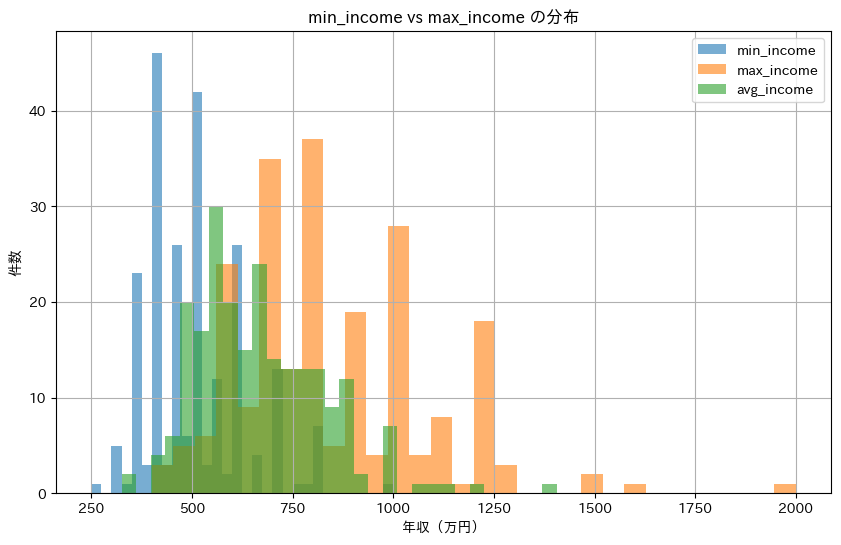

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# ヒストグラムを重ねて表示
plt.hist(df1["min_income"].dropna(), bins=30, alpha=0.6, label="min_income")
plt.hist(df1["max_income"].dropna(), bins=30, alpha=0.6, label="max_income")
plt.hist(df1["avg_income"].dropna(), bins=30, alpha=0.6, label="avg_income")

plt.title("min_income vs max_income の分布")
plt.xlabel("年収（万円）")
plt.ylabel("件数")
plt.legend()
plt.grid(True)
plt.show()